In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [3]:
# Load the dataset
file_path = r"C:\Users\pingk\Downloads\fadhli nitip\fadhli nitip\csv\data_rt4_countrybased_raw_nodrop.csv"  # Make sure the file path is correct
data = pd.read_csv(file_path)

In [4]:
data.head()

,prov_char,country_code,country_char,wavenumber,4000.122,3999.64,3999.158,3998.676,3998.194,3997.712,...,653.75,653.268,652.786,652.304,651.822,651.34,650.858,650.376,649.893,16158804.55800001
0,BBX,1,ID,ID-BBX-068-2307-031_001,0.000788,0.000813,0.000840,0.000858,0.000862,0.000843,...,0.011951,0.013370,0.014849,0.016154,0.017089,0.017538,0.017469,0.016946,0.016094,NaN
1,BBX,1,ID,ID-BBX-068-2307-031_002,0.001095,0.001078,0.001086,0.001114,0.001151,0.001180,...,0.012086,0.011914,0.011799,0.011801,0.011938,0.012208,0.012600,0.013097,0.013664,NaN
2,BBX,1,ID,ID-BBX-068-2307-031_003,0.000099,0.000153,0.000288,0.000470,0.000658,0.000814,...,0.010487,0.011307,0.012372,0.013532,0.014614,0.015469,0.015986,0.016134,0.015954,NaN
3,BBX,1,ID,ID-BBX-068-2307-031_004,0.001685,0.001802,0.001903,0.001975,0.002017,0.002031,...,0.008177,0.008240,0.008484,0.008982,0.009749,0.010722,0.011752,0.012653,0.013254,NaN
4,BBX,1,ID,ID-BBX-068-2307-031_005,0.002118,0.002196,0.002266,0.002324,0.002369,0.002404,...,0.009831,0.010143,0.010621,0.011171,0.011728,0.012274,0.012824,0.013402,0.014003,NaN


In [5]:
data.describe(include='all')

,prov_char,country_code,country_char,wavenumber,4000.122,3999.64,3999.158,3998.676,3998.194,3997.712,...,653.75,653.268,652.786,652.304,651.822,651.34,650.858,650.376,649.893,16158804.55800001
count,447,447.000000,447,447,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,...,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,0.0
unique,25,NaN,3,447,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SNI,NaN,TH,MY-SGR-096-2401-004_003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,75,NaN,361,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.221477,NaN,NaN,0.001279,0.001277,0.001277,0.001279,0.001286,0.001295,...,0.013692,0.013742,0.013847,0.013990,0.014141,0.014272,0.014354,0.014376,0.014337,NaN
std,NaN,0.480736,NaN,NaN,0.003983,0.003994,0.004009,0.004027,0.004048,0.004069,...,0.007954,0.007918,0.007826,0.007695,0.007549,0.007409,0.007291,0.007197,0.007127,NaN
min,NaN,0.000000,NaN,NaN,-0.053471,-0.053662,-0.053772,-0.053781,-0.053690,-0.053514,...,-0.099484,-0.098245,-0.095699,-0.092164,-0.088132,-0.084153,-0.080762,-0.078322,-0.076966,NaN
25%,NaN,0.000000,NaN,NaN,0.000008,0.000003,-0.000031,-0.000043,-0.000054,-0.000095,...,0.011937,0.012015,0.012305,0.012495,0.012564,0.012654,0.012732,0.012631,0.012610,NaN
50%,NaN,0.000000,NaN,NaN,0.001300,0.001353,0.001358,0.001390,0.001402,0.001363,...,0.014184,0.014284,0.014285,0.014418,0.014661,0.014679,0.014842,0.014915,0.014868,NaN
75%,NaN,0.000000,NaN,NaN,0.002414,0.002380,0.002389,0.002382,0.002427,0.002439,...,0.016450,0.016250,0.016455,0.016583,0.016644,0.016838,0.016899,0.016996,0.017127,NaN


In [6]:
data.isnull().sum()

prov_char              0
country_code           0
country_char           0
wavenumber             0
4000.122               0
                    ... 
651.34                 0
650.858                0
650.376                0
649.893                0
16158804.55800001    447
Length: 6955, dtype: int64

In [7]:
duplicates = data[data.duplicated()]

print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [prov_char, country_code, country_char, wavenumber, 4000.122, 3999.64, 3999.158, 3998.676, 3998.194, 3997.712, 3997.23, 3996.747, 3996.265, 3995.783, 3995.301, 3994.819, 3994.337, 3993.855, 3993.373, 3992.891, 3992.408, 3991.926, 3991.444, 3990.962, 3990.48, 3989.998, 3989.516, 3989.034, 3988.551, 3988.069, 3987.587, 3987.105, 3986.623, 3986.141, 3985.659, 3985.177, 3984.695, 3984.212, 3983.73, 3983.248, 3982.766, 3982.284, 3981.802, 3981.32, 3980.838, 3980.356, 3979.873, 3979.391, 3978.909, 3978.427, 3977.945, 3977.463, 3976.981, 3976.499, 3976.016, 3975.534, 3975.052, 3974.57, 3974.088, 3973.606, 3973.124, 3972.642, 3972.16, 3971.677, 3971.195, 3970.713, 3970.231, 3969.749, 3969.267, 3968.785, 3968.303, 3967.82, 3967.338, 3966.856, 3966.374, 3965.892, 3965.41, 3964.928, 3964.446, 3963.964, 3963.481, 3962.999, 3962.517, 3962.035, 3961.553, 3961.071, 3960.589, 3960.107, 3959.624, 3959.142, 3958.66, 3958.178, 3957.696, 3957.214, 3956.732, 3956.25

In [8]:
data.describe()

,country_code,4000.122,3999.64,3999.158,3998.676,3998.194,3997.712,3997.23,3996.747,3996.265,...,653.75,653.268,652.786,652.304,651.822,651.34,650.858,650.376,649.893,16158804.55800001
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,...,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,0.0
mean,0.221477,0.001279,0.001277,0.001277,0.001279,0.001286,0.001295,0.001307,0.001321,0.001334,...,0.013692,0.013742,0.013847,0.013990,0.014141,0.014272,0.014354,0.014376,0.014337,NaN
std,0.480736,0.003983,0.003994,0.004009,0.004027,0.004048,0.004069,0.004085,0.004094,0.004091,...,0.007954,0.007918,0.007826,0.007695,0.007549,0.007409,0.007291,0.007197,0.007127,NaN
min,0.000000,-0.053471,-0.053662,-0.053772,-0.053781,-0.053690,-0.053514,-0.053281,-0.053023,-0.052768,...,-0.099484,-0.098245,-0.095699,-0.092164,-0.088132,-0.084153,-0.080762,-0.078322,-0.076966,NaN
25%,0.000000,0.000008,0.000003,-0.000031,-0.000043,-0.000054,-0.000095,-0.000080,-0.000005,0.000052,...,0.011937,0.012015,0.012305,0.012495,0.012564,0.012654,0.012732,0.012631,0.012610,NaN
50%,0.000000,0.001300,0.001353,0.001358,0.001390,0.001402,0.001363,0.001341,0.001341,0.001337,...,0.014184,0.014284,0.014285,0.014418,0.014661,0.014679,0.014842,0.014915,0.014868,NaN
75%,0.000000,0.002414,0.002380,0.002389,0.002382,0.002427,0.002439,0.002484,0.002551,0.002558,...,0.016450,0.016250,0.016455,0.016583,0.016644,0.016838,0.016899,0.016996,0.017127,NaN
max,2.000000,0.019997,0.020251,0.020727,0.021413,0.022238,0.023088,0.023817,0.024292,0.024421,...,0.027743,0.027998,0.028441,0.029035,0.029704,0.030349,0.030858,0.031145,0.031169,NaN


In [9]:
data.isna().sum()

prov_char              0
country_code           0
country_char           0
wavenumber             0
4000.122               0
                    ... 
651.34                 0
650.858                0
650.376                0
649.893                0
16158804.55800001    447
Length: 6955, dtype: int64

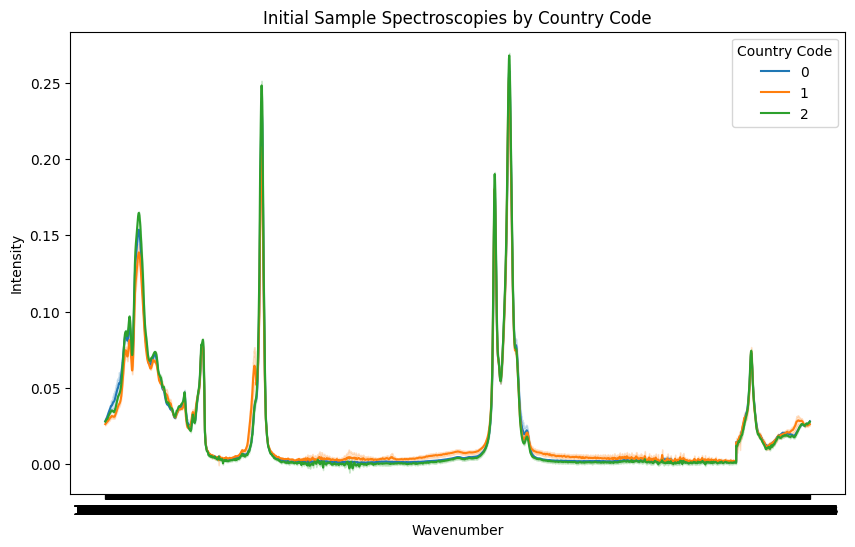

In [10]:
import seaborn as sns

# 'wavenumber', 'prov_char' and 'country_char' columns with strings that should be ignored
# to visualize spectroscopy data by 'country_code', excluding these character columns

# Exclude 'prov_char' and 'country_char' from the spectroscopy data columns
spectroscopy_columns = data.columns.difference(['country_code', 'prov_char', 'country_char','wavenumber'])

# Melting the DataFrame to have a long format suitable for seaborn's lineplot
melted_data = data.melt(id_vars='country_code', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_data, x='Wavenumber', y='Intensity', hue='country_code', palette='tab10')
plt.title('Initial Sample Spectroscopies by Country Code')
plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.legend(title='Country Code')
plt.show()

In [11]:
# Extract FTIR spectrum data
ftir_data = data.iloc[:, 4:-1]  # Exclude metadata columns and last column with NaN values
ftir_data = ftir_data.apply(pd.to_numeric, errors='coerce').fillna(0)  # Convert to numeric and handle NaNs

ftir_data.head()

,4000.122,3999.64,3999.158,3998.676,3998.194,3997.712,3997.23,3996.747,3996.265,3995.783,...,654.232,653.75,653.268,652.786,652.304,651.822,651.34,650.858,650.376,649.893
0,0.000788,0.000813,0.000840,0.000858,0.000862,0.000843,0.000797,0.000719,0.000609,0.000476,...,0.010798,0.011951,0.013370,0.014849,0.016154,0.017089,0.017538,0.017469,0.016946,0.016094
1,0.001095,0.001078,0.001086,0.001114,0.001151,0.001180,0.001182,0.001144,0.001064,0.000951,...,0.012223,0.012086,0.011914,0.011799,0.011801,0.011938,0.012208,0.012600,0.013097,0.013664
2,0.000099,0.000153,0.000288,0.000470,0.000658,0.000814,0.000909,0.000928,0.000871,0.000755,...,0.010014,0.010487,0.011307,0.012372,0.013532,0.014614,0.015469,0.015986,0.016134,0.015954
3,0.001685,0.001802,0.001903,0.001975,0.002017,0.002031,0.002019,0.001983,0.001925,0.001851,...,0.008214,0.008177,0.008240,0.008484,0.008982,0.009749,0.010722,0.011752,0.012653,0.013254
4,0.002118,0.002196,0.002266,0.002324,0.002369,0.002404,0.002435,0.002460,0.002472,0.002461,...,0.009767,0.009831,0.010143,0.010621,0.011171,0.011728,0.012274,0.012824,0.013402,0.014003


In [12]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(ftir_data)

In [13]:
from sklearn.metrics import make_scorer, silhouette_score

# Evaluate clustering
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(ftir_data, kmeans_clusters)

print(f'K-means Inertia: {inertia}')
print(f'K-means Silhouette Score: {silhouette_avg}')


K-means Inertia: 76.2325008241993
K-means Silhouette Score: 0.8753749227082493


In [14]:
# Perform PCA for visualization
pca = PCA(n_components=10, random_state=42)
pca_transformed_data = pca.fit_transform(ftir_data)

In [15]:
# Function to plot confidence ellipses
def plot_colored_confidence_ellipse(ax, data, color, n_std=2.0, **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *data*.
    """
    cov = np.cov(data, rowvar=False)
    mean = np.mean(data, axis=0)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
                      width=ell_radius_x * 2 * n_std,
                      height=ell_radius_y * 2 * n_std,
                      facecolor=color, edgecolor='none', alpha=0.2, **kwargs)
    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_x, mean_y = mean
    transf = (transforms.Affine2D()
              .rotate_deg(45)
              .scale(scale_x, scale_y)
              .translate(mean_x, mean_y))
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

Text(0.5, 1.0, 'PCA of FTIR Data with K-means Clustering')

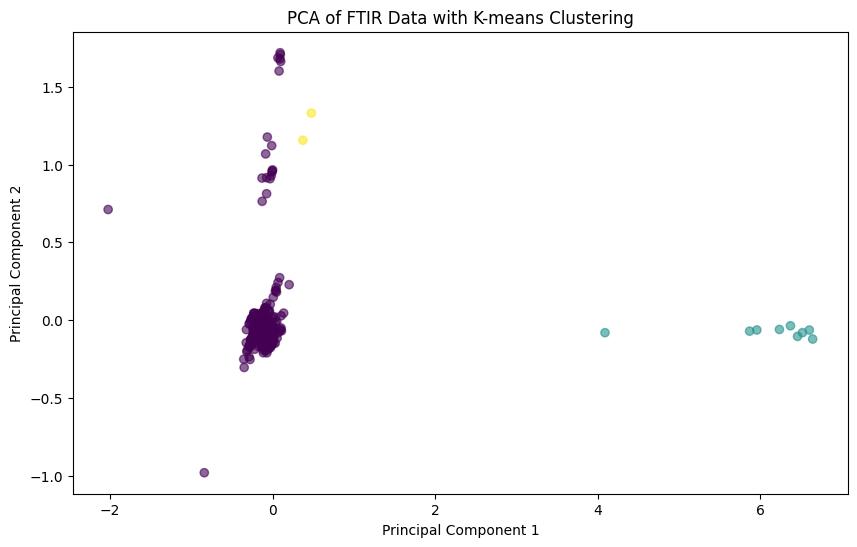

In [16]:
# Plot the PCA results with K-means clustering and colored confidence ellipses with colorbar
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], c=kmeans_clusters, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of FTIR Data with K-means Clustering')

C:\Users\pingk\AppData\Local\Temp\ipykernel_13088\3833407136.py:10: RuntimeWarning: invalid value encountered in sqrt
  ell_radius_y = np.sqrt(1 - pearson)


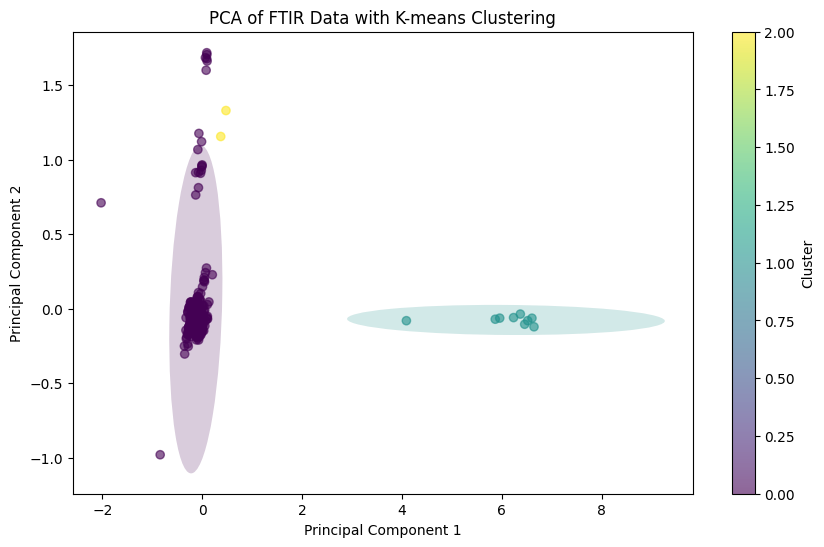

In [17]:
# Function to plot confidence ellipses
def plot_colored_confidence_ellipse(ax, data, color, n_std=2.0, **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *data*.
    """
    cov = np.cov(data, rowvar=False)
    mean = np.mean(data, axis=0)[:2]  # Ensure we only take the first two dimensions
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
                      width=ell_radius_x * 2 * n_std,
                      height=ell_radius_y * 2 * n_std,
                      facecolor=color, edgecolor='none', alpha=0.2, **kwargs)
    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_x, mean_y = mean
    transf = (transforms.Affine2D()
              .rotate_deg(45)
              .scale(scale_x, scale_y)
              .translate(mean_x, mean_y))
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Plot the PCA results with K-means clustering and colored confidence ellipses with colorbar
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], c=kmeans_clusters, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of FTIR Data with K-means Clustering')

# Add colored confidence ellipses
ax = plt.gca()
colors = plt.cm.viridis(np.linspace(0, 1, len(np.unique(kmeans_clusters))))
for cluster, color in zip(np.unique(kmeans_clusters), colors):
    plot_colored_confidence_ellipse(ax, pca_transformed_data[kmeans_clusters == cluster, :], color=color)

plt.colorbar(scatter, label='Cluster')
plt.show()

C:\Users\pingk\AppData\Local\Temp\ipykernel_13088\3833407136.py:10: RuntimeWarning: invalid value encountered in sqrt
  ell_radius_y = np.sqrt(1 - pearson)


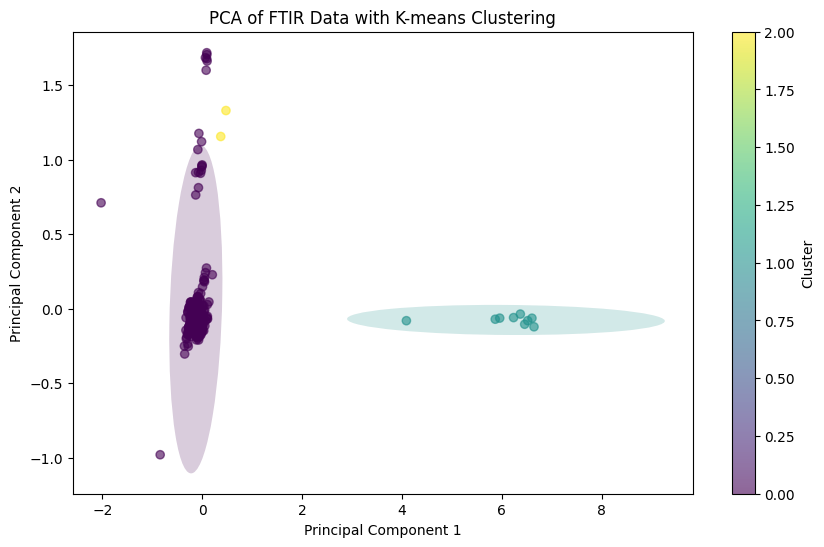

In [18]:
# Plot the PCA results with K-means clustering and colored confidence ellipses with colorbar
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], c=kmeans_clusters, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of FTIR Data with K-means Clustering')

# Add colored confidence ellipses
ax = plt.gca()
colors = plt.cm.viridis(np.linspace(0, 1, len(np.unique(kmeans_clusters))))
for cluster, color in zip(np.unique(kmeans_clusters), colors):
    plot_colored_confidence_ellipse(ax, pca_transformed_data[kmeans_clusters == cluster, :], color=color)

plt.colorbar(scatter, label='Cluster')
plt.show()


C:\Users\pingk\AppData\Local\Temp\ipykernel_13088\3833407136.py:10: RuntimeWarning: invalid value encountered in sqrt
  ell_radius_y = np.sqrt(1 - pearson)


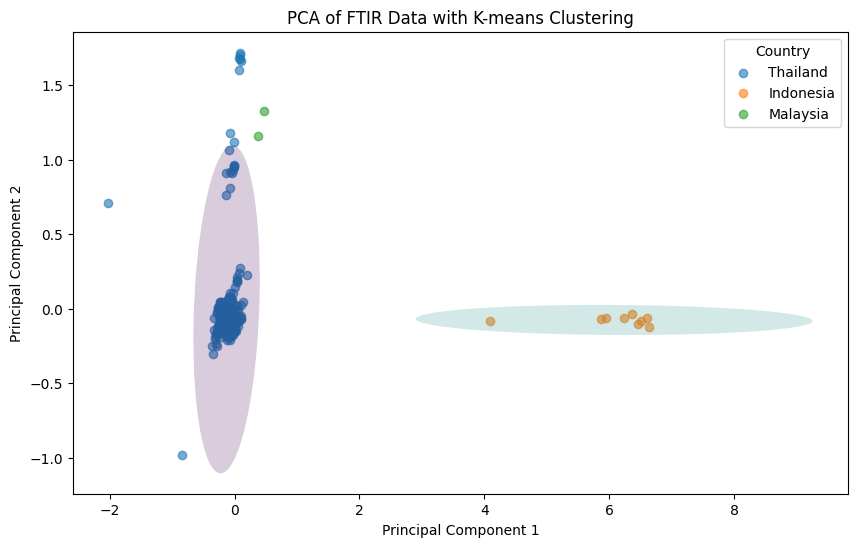

In [19]:
# Plot the PCA results with K-means clustering and colored confidence ellipses with legend
country_labels = {0: 'Thailand', 1: 'Indonesia', 2: 'Malaysia'}
plt.figure(figsize=(10, 6))
for cluster in np.unique(kmeans_clusters):
    cluster_data = pca_transformed_data[kmeans_clusters == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=country_labels[cluster], alpha=0.6)

# Add colored confidence ellipses
ax = plt.gca()
for cluster, color in zip(np.unique(kmeans_clusters), colors):
    plot_colored_confidence_ellipse(ax, pca_transformed_data[kmeans_clusters == cluster, :], color=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of FTIR Data with K-means Clustering')
plt.legend(title='Country')
plt.show()


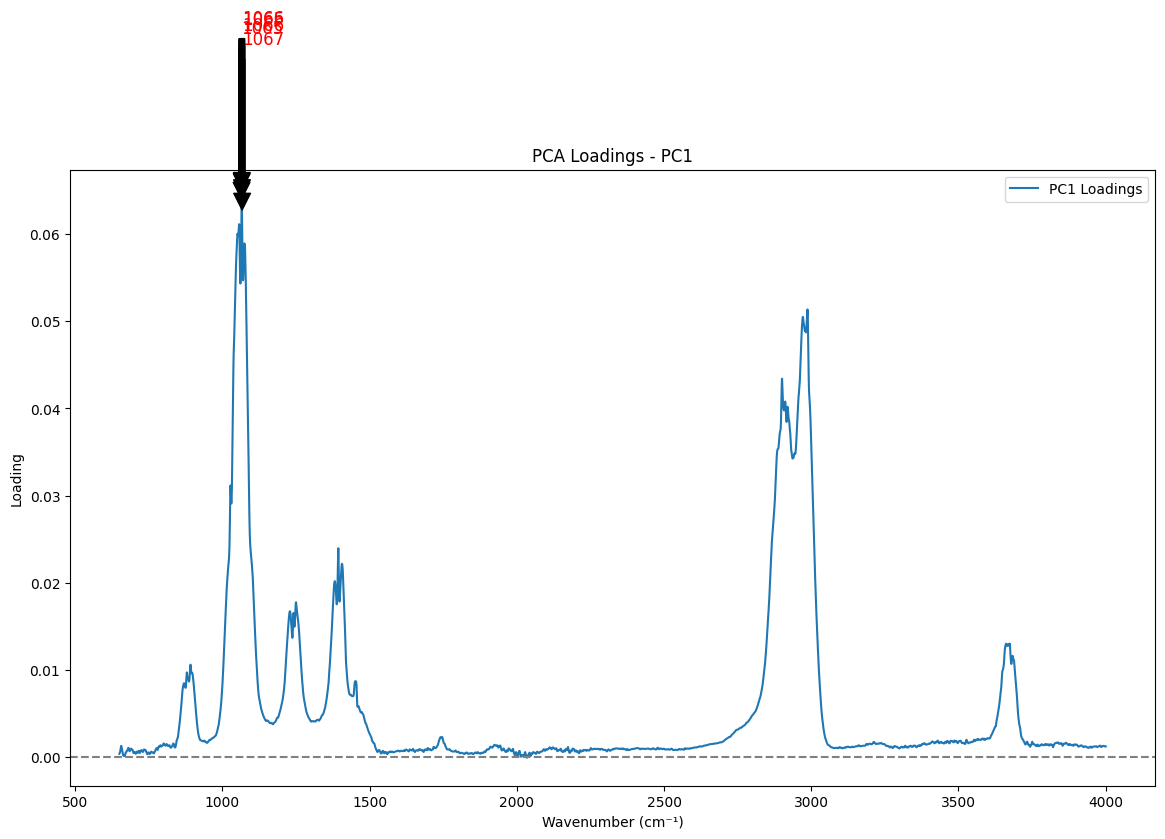

In [20]:
# Identify key wavenumbers from PCA loadings for PC1
loadings = pca.components_
wavenumbers = data.columns[4:-1].astype(float)
pc1_loadings = loadings[0]

# Plot loadings for the first principal component with additional details
plt.figure(figsize=(14, 8))
plt.plot(wavenumbers, pc1_loadings, label='PC1 Loadings')
plt.axhline(0, color='gray', linestyle='dashed')

# Identify the 5 most influencing wavenumbers for PC1
top_indices_pc1 = np.argsort(np.abs(pc1_loadings))[-5:]
top_wavenumbers_pc1 = wavenumbers[top_indices_pc1]
top_loadings_pc1 = pc1_loadings[top_indices_pc1]

# Annotate the 5 most influencing wavenumbers for PC1
for i, (wavenumber, loading) in enumerate(zip(top_wavenumbers_pc1, top_loadings_pc1)):
    plt.annotate(f'{wavenumber:.0f}', xy=(wavenumber, loading), xytext=(wavenumber, loading + 0.02),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=12, color='red')

plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Loading')
plt.title('PCA Loadings - PC1')
plt.legend()
plt.show()


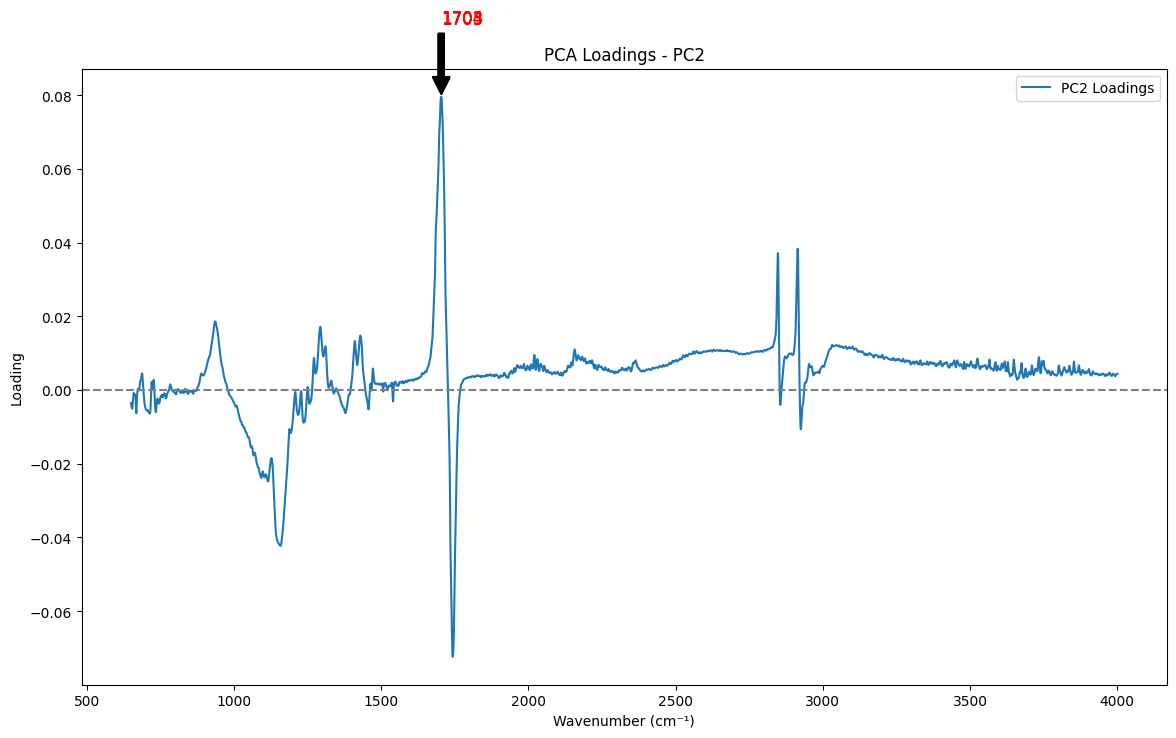

In [21]:
# Identify key wavenumbers from PCA loadings for PC2
pc2_loadings = loadings[1]

# Plot loadings for the second principal component with additional details
plt.figure(figsize=(14, 8))
plt.plot(wavenumbers, pc2_loadings, label='PC2 Loadings')
plt.axhline(0, color='gray', linestyle='dashed')

# Identify the 5 most influencing wavenumbers for PC2
top_indices_pc2 = np.argsort(np.abs(pc2_loadings))[-5:]
top_wavenumbers_pc2 = wavenumbers[top_indices_pc2]
top_loadings_pc2 = pc2_loadings[top_indices_pc2]

# Annotate the 5 most influencing wavenumbers for PC2
for i, (wavenumber, loading) in enumerate(zip(top_wavenumbers_pc2, top_loadings_pc2)):
    plt.annotate(f'{wavenumber:.0f}', xy=(wavenumber, loading), xytext=(wavenumber, loading + 0.02),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=12, color='red')

plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Loading')
plt.title('PCA Loadings - PC2')
plt.legend()
plt.show()


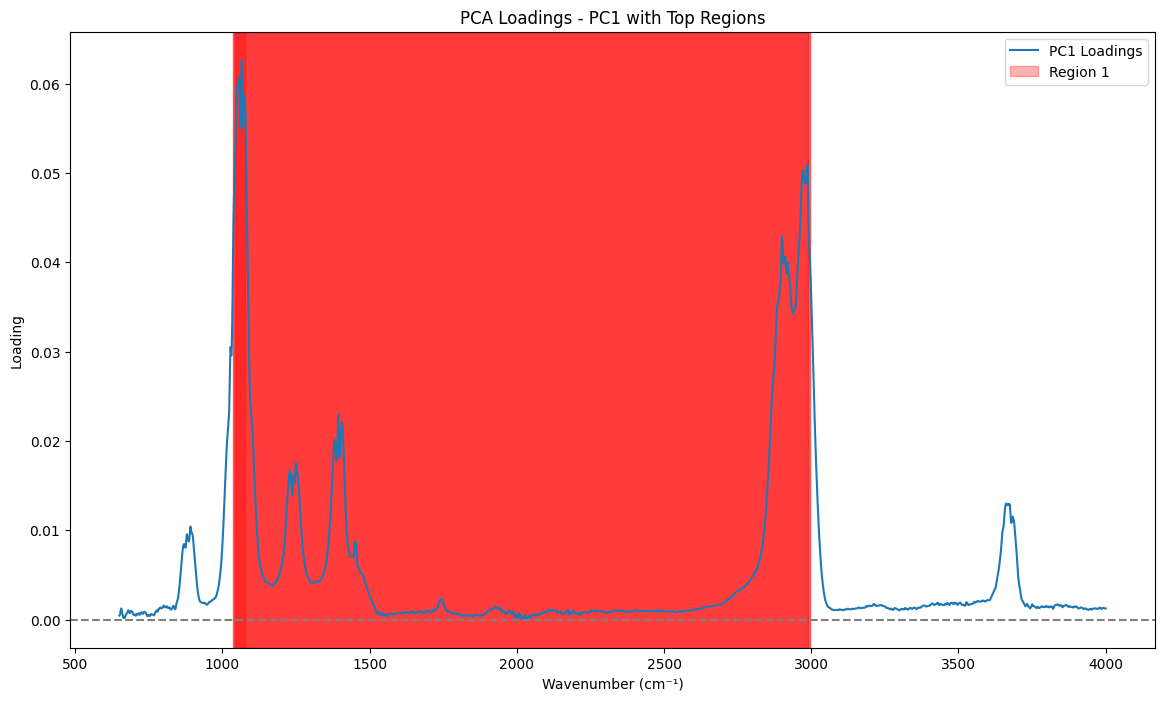

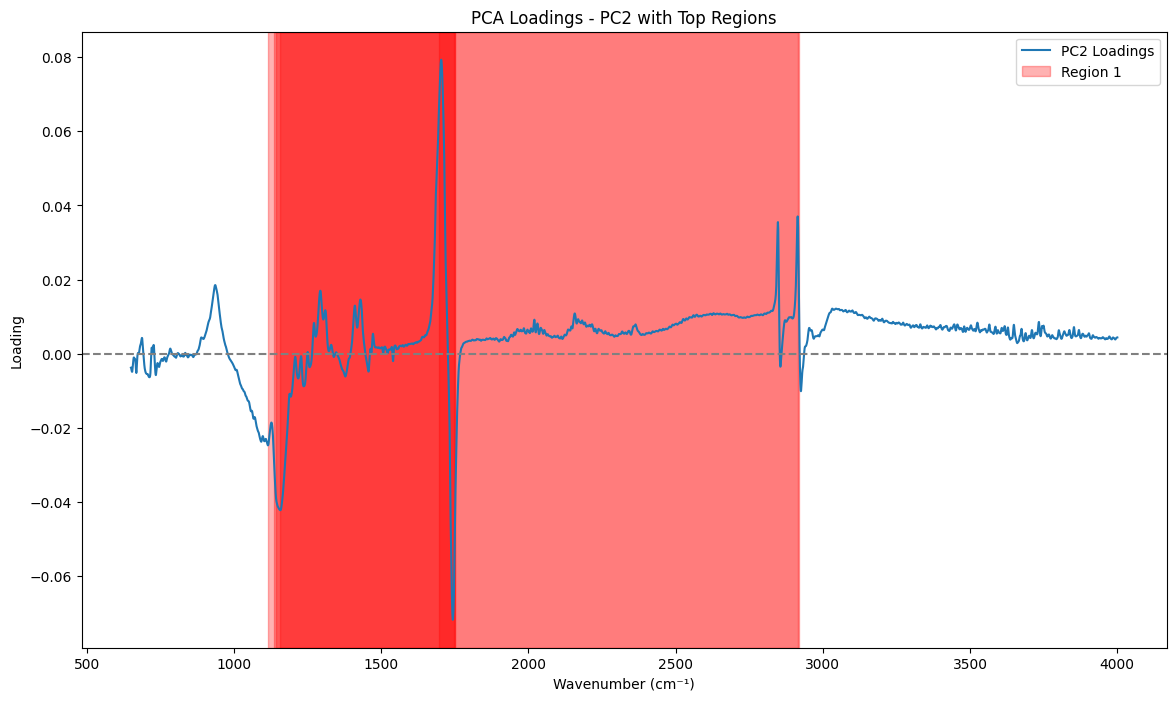

,Start (cm⁻¹),End (cm⁻¹)
Region 1,1046.675,1077.531
Region 2,1041.372,2988.159
Region 3,1037.997,2990.570
Region 4,1036.069,2994.427
Region 5,1035.587,2996.837


,Start (cm⁻¹),End (cm⁻¹)
Region 1,1695.122,1747.191
Region 2,1156.116,1750.566
Region 3,1142.617,1751.530
Region 4,1137.313,2916.324
Region 5,1114.654,2917.288


In [22]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Function to smooth the loadings
def smooth_loadings(loadings, sigma=2):
    return gaussian_filter1d(loadings, sigma=sigma)

# Smooth the PC1 and PC2 loadings
smoothed_pc1_loadings = smooth_loadings(pc1_loadings)
smoothed_pc2_loadings = smooth_loadings(pc2_loadings)

# Function to identify top regions
def identify_top_regions(loadings, wavenumbers, num_regions=5, region_width=50):
    sorted_indices = np.argsort(np.abs(loadings))[::-1]
    top_indices = sorted_indices[:num_regions * region_width]
    top_regions = []
    
    for i in range(num_regions):
        region_indices = top_indices[i * region_width:(i + 1) * region_width]
        min_wavenumber = wavenumbers[region_indices].min()
        max_wavenumber = wavenumbers[region_indices].max()
        top_regions.append((min_wavenumber, max_wavenumber))
    
    return top_regions

# Identify top regions for PC1 and PC2
top_regions_pc1 = identify_top_regions(smoothed_pc1_loadings, wavenumbers)
top_regions_pc2 = identify_top_regions(smoothed_pc2_loadings, wavenumbers)

# Plot loadings for the first principal component with regions
plt.figure(figsize=(14, 8))
plt.plot(wavenumbers, smoothed_pc1_loadings, label='PC1 Loadings')
plt.axhline(0, color='gray', linestyle='dashed')

# Annotate regions
for i, (start, end) in enumerate(top_regions_pc1):
    plt.axvspan(start, end, color='red', alpha=0.3, label=f'Region {i+1}' if i == 0 else "")

plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Loading')
plt.title('PCA Loadings - PC1 with Top Regions')
plt.legend()
plt.show()

# Plot loadings for the second principal component with regions
plt.figure(figsize=(14, 8))
plt.plot(wavenumbers, smoothed_pc2_loadings, label='PC2 Loadings')
plt.axhline(0, color='gray', linestyle='dashed')

# Annotate regions
for i, (start, end) in enumerate(top_regions_pc2):
    plt.axvspan(start, end, color='red', alpha=0.3, label=f'Region {i+1}' if i == 0 else "")

plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Loading')
plt.title('PCA Loadings - PC2 with Top Regions')
plt.legend()
plt.show()

# Create a table with the identified regions
regions_table_pc1 = pd.DataFrame(top_regions_pc1, columns=['Start (cm⁻¹)', 'End (cm⁻¹)'])
regions_table_pc1.index = [f'Region {i+1}' for i in range(len(top_regions_pc1))]
regions_table_pc2 = pd.DataFrame(top_regions_pc2, columns=['Start (cm⁻¹)', 'End (cm⁻¹)'])
regions_table_pc2.index = [f'Region {i+1}' for i in range(len(top_regions_pc2))]

# Display the tables
display(regions_table_pc1)
display(regions_table_pc2)
